In [18]:
import os
import numpy as np
from skimage import io, color
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
# Function to compute image differences
def image_difference(image1, image2):
    return np.abs(image1 - image2)

In [4]:
# Function to compute image ratio
def image_ratio(image1, image2):
    # Convert images to floating-point arrays
    image1_float = image1.astype(float)
    image2_float = image2.astype(float)
    
    # Perform division, handling divide by zero cases
    ratio = np.divide(image1_float, image2_float, out=np.zeros_like(image1_float), where=(image2_float!=0))
    
    return ratio



In [5]:
# Function to compute change vector analysis (CVA)
def change_vector_analysis(image1, image2):
    hsv1 = color.rgb2hsv(image1)
    hsv2 = color.rgb2hsv(image2)
    hue_diff = np.abs(hsv1[:,:,0] - hsv2[:,:,0])
    saturation_diff = np.abs(hsv1[:,:,1] - hsv2[:,:,1])
    value_diff = np.abs(hsv1[:,:,2] - hsv2[:,:,2])
    return hue_diff, saturation_diff, value_diff


In [6]:
# Load images from folders A and B
folder_A = 'trainval/A'
folder_B = 'trainval/B'
folder_label = 'trainval/label'




In [7]:
images_A = load_images_from_folder(folder_A)

In [15]:
print(images_A[40])

[[[163 155 136]
  [163 155 136]
  [164 156 137]
  ...
  [162 155 136]
  [161 154 135]
  [161 154 135]]

 [[164 156 137]
  [164 156 137]
  [164 156 137]
  ...
  [161 154 135]
  [161 154 135]
  [161 154 135]]

 [[166 158 138]
  [165 157 137]
  [165 157 137]
  ...
  [162 155 136]
  [162 155 136]
  [162 155 136]]

 ...

 [[133 140 133]
  [133 140 133]
  [132 139 132]
  ...
  [137 140 128]
  [136 139 128]
  [134 137 126]]

 [[138 145 137]
  [138 145 137]
  [138 145 137]
  ...
  [140 146 134]
  [138 144 132]
  [136 142 130]]

 [[143 150 142]
  [143 150 142]
  [143 150 142]
  ...
  [141 147 135]
  [141 147 135]
  [141 147 135]]]


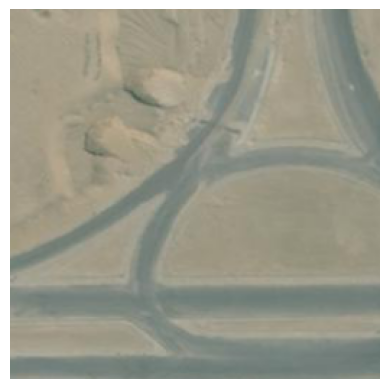

In [16]:
plt.imshow(images_A[40])
plt.axis('off')  
plt.show()

In [19]:
images_B = load_images_from_folder(folder_B)


In [20]:
labels = load_images_from_folder(folder_label)

In [12]:
# # Prepare feature vectors and labels for image differencing
# X_diff = []
# y_diff = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     diff = image_difference(image_A, image_B).flatten()
#     X_diff.append(diff)
#     y_diff.append(label.flatten())

# X_diff = np.array(X_diff)
# y_diff = np.array(y_diff)

In [13]:
# print(X_diff.shape, y_diff.shape)

(4868, 196608) (4868, 65536)


In [17]:
def compute_absolute_difference(image1, image2):
    return cv2.absdiff(image1, image2)

In [45]:
def threshold_image(diff_image, threshold):
    _, binary_mask = cv2.threshold(diff_image, threshold, 255, cv2.THRESH_BINARY)
    # Convert to single-channel by averaging across channels
    binary_mask = np.mean(binary_mask, axis=2)
    return binary_mask


In [158]:
def evaluate_change_detection(binary_mask, labels):
    # Flatten the binary mask and labels for comparison
    binary_flat = binary_mask.flatten()
    labels_flat = labels.flatten()
    
    # Compute evaluation metrics
    accuracy = accuracy_score(labels_flat, binary_flat)
    precision = precision_score(labels_flat, binary_flat, average='micro')
    recall = recall_score(labels_flat, binary_flat, average='micro')
    

    
    return accuracy, precision, recall

In [161]:
threshold_value = 50  # You may need to experiment with different threshold values

evaluation_results = []

In [162]:
print(np.max(np.array(labels[0]).flatten()))


255


In [163]:
i = 0
for image_A, image_B, label in zip(images_A, images_B, labels):
    print("image:",i)
    # Step 1: Compute absolute difference
    abs_diff = compute_absolute_difference(image_A, image_B)
    
    # Step 2: Threshold the absolute difference
    binary_mask = threshold_image(abs_diff, threshold_value)
    
  

    # print(np.array(labels).flatten())
    
    # print(np.array(label))
    # print(np.array(binary_mask))
    
    # Step 3: Evaluate change detection
    accuracy, precision, recall = evaluate_change_detection(binary_mask, np.array(label))
    
    evaluation_results.append((accuracy, precision, recall))
    i += 1

image: 0
image: 1
image: 2
image: 3
image: 4
image: 5
image: 6
image: 7
image: 8
image: 9
image: 10
image: 11
image: 12
image: 13
image: 14
image: 15
image: 16
image: 17
image: 18
image: 19
image: 20
image: 21
image: 22
image: 23
image: 24
image: 25
image: 26
image: 27
image: 28
image: 29
image: 30
image: 31
image: 32
image: 33
image: 34
image: 35
image: 36
image: 37
image: 38
image: 39
image: 40
image: 41
image: 42
image: 43
image: 44
image: 45
image: 46
image: 47
image: 48
image: 49
image: 50
image: 51
image: 52
image: 53
image: 54
image: 55
image: 56
image: 57
image: 58
image: 59
image: 60
image: 61
image: 62
image: 63
image: 64
image: 65
image: 66
image: 67
image: 68
image: 69
image: 70
image: 71
image: 72
image: 73
image: 74
image: 75
image: 76
image: 77
image: 78
image: 79
image: 80
image: 81
image: 82
image: 83
image: 84
image: 85
image: 86
image: 87
image: 88
image: 89
image: 90
image: 91
image: 92
image: 93
image: 94
image: 95
image: 96
image: 97
image: 98
image: 99
image: 100

In [164]:
# Calculate average evaluation metrics
avg_accuracy = np.mean([result[0] for result in evaluation_results])
avg_precision = np.mean([result[1] for result in evaluation_results])
avg_recall = np.mean([result[2] for result in evaluation_results])

In [165]:
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)

Average Accuracy: 0.6680884349512681
Average Precision: 0.6680884349512681
Average Recall: 0.6680884349512681


In [8]:
# # Prepare feature vectors and labels for rationing
# X_ratio = []
# y_ratio = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     ratio = image_ratio(image_A, image_B).flatten()
#     X_ratio.append(ratio)
#     y_ratio.append(label.flatten())

# X_ratio = np.array(X_ratio)
# y_ratio = np.array(y_ratio).flatten()

In [9]:
# # Prepare feature vectors and labels for change vector analysis (CVA)
# X_cva = []
# y_cva = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     hue_diff, sat_diff, val_diff = change_vector_analysis(image_A, image_B)
#     features = np.concatenate((hue_diff.flatten(), sat_diff.flatten(), val_diff.flatten()))
#     X_cva.append(features)
#     y_cva.append(label.flatten())

# X_cva = np.array(X_cva)
# y_cva = np.array(y_cva).flatten()

In [14]:
# # Split data into training and testing sets for image differencing
# X_diff_train, X_diff_test, y_diff_train, y_diff_test = train_test_split(X_diff, y_diff, test_size=0.2, random_state=42)


In [ ]:
# # Train Random Forest classifier for image differencing
# clf_diff = RandomForestClassifier(n_estimators=100, random_state=42)
# clf_diff.fit(X_diff_train, y_diff_train)

In [ ]:
# # Predict labels for test data for image differencing
# y_diff_pred = clf_diff.predict(X_diff_test)

In [ ]:
# # Evaluate model performance for image differencing
# accuracy_diff = accuracy_score(y_diff_test, y_diff_pred)
# print("Accuracy for Image Differencing:", accuracy_diff)
# print("Classification Report for Image Differencing:\n", classification_report(y_diff_test, y_diff_pred))
